In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [18]:
df = pd.read_csv('./dataset/raw/train.csv')
df

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,yes,yes
1,2,aluminum,20,4.0,unworn,yes,yes
2,3,aluminum,6,3.0,unworn,yes,yes
3,4,aluminum,6,2.5,unworn,no,NaN
4,5,aluminum,20,3.0,unworn,no,NaN
5,6,aluminum,6,4.0,worn,yes,no
6,7,aluminum,20,4.0,worn,no,NaN
7,8,aluminum,20,4.0,worn,yes,no
8,9,aluminum,15,4.0,worn,yes,no
9,10,aluminum,12,4.0,worn,yes,no


In [19]:
ok = df.fillna(2)
ok = ok.replace('yes',0)
ok = ok.replace('no',1)
ok

,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,1,aluminum,6,4.0,unworn,0,0
1,2,aluminum,20,4.0,unworn,0,0
2,3,aluminum,6,3.0,unworn,0,0
3,4,aluminum,6,2.5,unworn,1,2
4,5,aluminum,20,3.0,unworn,1,2
5,6,aluminum,6,4.0,worn,0,1
6,7,aluminum,20,4.0,worn,1,2
7,8,aluminum,20,4.0,worn,0,1
8,9,aluminum,15,4.0,worn,0,1
9,10,aluminum,12,4.0,worn,0,1


In [20]:
for raw in range(len(ok)):
    if ok.loc[raw,'machining_finalized']==1:
        ok.loc[raw,'error'] = 1
    elif ok.loc[raw,'passed_visual_inspection']==1:
        ok.loc[raw,'error'] = 1
    else:
        ok.loc[raw,'error'] = 0
        
    if ok.loc[raw,'tool_condition']=='worn':
        ok.loc[raw,'tool_condition'] = 1
    else: 
        ok.loc[raw,'tool_condition'] = 0
        
ok = ok[['feedrate','clamp_pressure','tool_condition','error']]
ok['error'] = ok['error'].astype('int')
        
ok

C:\Users\USER\AppData\Local\Temp\ipykernel_14752\1396458311.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ok['error'] = ok['error'].astype('int')


,feedrate,clamp_pressure,tool_condition,error
0,6,4.0,0,0
1,20,4.0,0,0
2,6,3.0,0,0
3,6,2.5,0,1
4,20,3.0,0,1
5,6,4.0,1,1
6,20,4.0,1,1
7,20,4.0,1,1
8,15,4.0,1,1
9,12,4.0,1,1


In [6]:
df = pd.read_csv('./dataset/raw/exp/experiment_01.csv')
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,202,4.000,4.00,202,4.0,4.000000,0.18,0.0207,329,2.77,...,0.5240,2.740000e-19,329,0.0,6.960000e-07,16,1,0,50,Starting
1,202,-6.800,-346.00,202,-9.6,-354.000000,-10.90,0.1860,328,23.30,...,-0.2880,2.740000e-19,328,0.0,-5.270000e-07,16,1,4,50,Prep
2,200,-13.800,-2.25,200,-13.9,3.999905,-8.59,0.1400,328,30.60,...,0.5240,2.740000e-19,328,0.0,9.100000e-07,16,1,7,50,Prep
3,198,-14.000,4.00,198,-13.9,3.999905,-6.11,0.1300,327,30.30,...,-0.1800,2.740000e-19,328,0.0,1.070000e-06,16,1,7,50,Prep
4,197,-13.900,-14.80,196,-13.9,4.000095,-5.70,0.1140,328,30.50,...,0.2260,2.740000e-19,328,0.0,1.960000e-06,16,1,7,50,Prep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,145,4.175,91.50,145,4.0,4.000000,-2.84,0.0522,325,7.39,...,20.5000,9.310000e-01,319,118.0,1.790000e-01,16,1,132,50,end
1051,145,3.850,-83.50,145,4.0,4.000000,-1.85,0.0522,325,2.69,...,15.8000,7.200000e-01,319,117.0,1.380000e-01,16,1,132,50,end
1052,145,3.825,-83.50,145,4.0,4.000000,-2.20,0.0527,325,2.22,...,24.3000,1.000000e+00,318,120.0,1.920000e-01,16,1,132,50,end
1053,145,4.150,91.50,145,4.0,4.000000,-4.02,0.0502,326,5.80,...,22.4000,9.290000e-01,321,120.0,1.780000e-01,16,1,132,50,end


In [7]:
for idx, val in enumerate(df['Machining_Process'].unique()):
        df['Machining_Process'] = df['Machining_Process'].replace(val, str(idx))
df['Machining_Process'].astype('int')
        
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,202,4.000,4.00,202,4.0,4.000000,0.18,0.0207,329,2.77,...,0.5240,2.740000e-19,329,0.0,6.960000e-07,16,1,0,50,0
1,202,-6.800,-346.00,202,-9.6,-354.000000,-10.90,0.1860,328,23.30,...,-0.2880,2.740000e-19,328,0.0,-5.270000e-07,16,1,4,50,1
2,200,-13.800,-2.25,200,-13.9,3.999905,-8.59,0.1400,328,30.60,...,0.5240,2.740000e-19,328,0.0,9.100000e-07,16,1,7,50,1
3,198,-14.000,4.00,198,-13.9,3.999905,-6.11,0.1300,327,30.30,...,-0.1800,2.740000e-19,328,0.0,1.070000e-06,16,1,7,50,1
4,197,-13.900,-14.80,196,-13.9,4.000095,-5.70,0.1140,328,30.50,...,0.2260,2.740000e-19,328,0.0,1.960000e-06,16,1,7,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,145,4.175,91.50,145,4.0,4.000000,-2.84,0.0522,325,7.39,...,20.5000,9.310000e-01,319,118.0,1.790000e-01,16,1,132,50,9
1051,145,3.850,-83.50,145,4.0,4.000000,-1.85,0.0522,325,2.69,...,15.8000,7.200000e-01,319,117.0,1.380000e-01,16,1,132,50,9
1052,145,3.825,-83.50,145,4.0,4.000000,-2.20,0.0527,325,2.22,...,24.3000,1.000000e+00,318,120.0,1.920000e-01,16,1,132,50,9
1053,145,4.150,91.50,145,4.0,4.000000,-4.02,0.0502,326,5.80,...,22.4000,9.290000e-01,321,120.0,1.780000e-01,16,1,132,50,9


In [9]:
# y = df[['Machining_Process']]
# x = df.drop(['Machining_Process'],axis=1)
col = df.columns
df = df.values

x = StandardScaler().fit_transform(df)

df = pd.DataFrame(x,columns=col)
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_CurrentFeedback,S_DCBusVoltage,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process
0,5.534368,0.087675,-0.041190,5.538777,0.087939,-0.000925,0.114051,-2.016592,5.418415,-1.257412,...,-3.628983,-4.171734,3.318274,-5.612544,-4.643695,0.0,0.0,-1.617742,3.935019,-2.307454
1,5.534368,-1.751225,-3.431002,5.538777,-2.229522,-4.405549,-2.131451,3.456409,3.684062,1.975154,...,-3.776432,-4.171734,2.941765,-5.612544,-4.643728,0.0,0.0,-1.516860,3.935019,-1.847359
2,5.293753,-2.943104,-0.101722,5.297965,-2.962249,-0.000926,-1.663301,1.933372,3.684062,3.124581,...,-3.628983,-4.171734,2.941765,-5.612544,-4.643689,0.0,0.0,-1.441199,3.935019,-1.847359
3,5.053138,-2.977158,-0.041190,5.057154,-2.962249,-0.000926,-1.160697,1.602277,1.949709,3.077344,...,-3.756820,-4.171734,2.941765,-5.612544,-4.643685,0.0,0.0,-1.441199,3.935019,-1.847359
4,4.932831,-2.960131,-0.223271,4.816342,-2.962249,-0.000924,-1.077605,1.072525,3.684062,3.108835,...,-3.683096,-4.171734,2.941765,-5.612544,-4.643661,0.0,0.0,-1.441199,3.935019,-1.847359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,-1.323153,0.117472,0.806263,-1.324349,0.087939,-0.000925,-0.497990,-0.973642,-1.518997,-0.529966,...,-0.001604,0.135502,-0.446814,0.172157,0.192075,0.0,0.0,1.711357,3.935019,1.833403
1051,-1.323153,0.062134,-0.888643,-1.324349,0.087939,-0.000925,-0.297354,-0.973642,-1.518997,-1.270008,...,-0.855062,-0.840682,-0.446814,0.123134,-0.915564,0.0,0.0,1.711357,3.935019,1.833403
1052,-1.323153,0.057878,-0.888643,-1.324349,0.087939,-0.000925,-0.368286,-0.957087,-1.518997,-1.344012,...,0.688427,0.454728,-0.823323,0.270203,0.543277,0.0,0.0,1.711357,3.935019,1.833403
1053,-1.323153,0.113215,0.806263,-1.324349,0.087939,-0.000925,-0.737132,-1.039861,0.215356,-0.780321,...,0.343412,0.126249,0.306203,0.270203,0.165059,0.0,0.0,1.711357,3.935019,1.833403


In [10]:
features =x.T  # X 데이터는 150 × 4 이라면,
               # feature 는 4 × 150 이다.

cov_mat = np.cov(features)
cov_mat

array([[ 1.00094877, -0.1947149 , -0.09260722, ..., -0.08283529,
         0.19084564, -0.12099744],
       [-0.1947149 ,  1.00094877, -0.00469799, ...,  0.08190077,
        -0.16109372,  0.09456575],
       [-0.09260722, -0.00469799,  1.00094877, ..., -0.01905529,
         0.03551318, -0.04644557],
       ...,
       [-0.08283529,  0.08190077, -0.01905529, ...,  1.00094877,
        -0.12241426,  0.80120989],
       [ 0.19084564, -0.16109372,  0.03551318, ..., -0.12241426,
         1.00094877, -0.21755673],
       [-0.12099744,  0.09456575, -0.04644557, ...,  0.80120989,
        -0.21755673,  1.00094877]])

In [11]:
values, vectors = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s '% values[:])
print('\nEigenvectros \n%s'  %  vectors[:])


Eigenvalues 
[1.27925139e+01 3.13662683e+00 2.49701470e+00 2.14517784e+00
 2.11286289e+00 2.00241274e+00 1.86496705e+00 1.64154400e+00
 1.58705578e+00 1.51857527e+00 1.32493734e+00 1.21197726e+00
 1.14557569e+00 1.00735857e+00 8.75795937e-01 8.19319704e-01
 7.96882771e-01 7.22424545e-01 5.59777532e-01 3.82877625e-01
 3.09452597e-01 2.59485651e-01 2.19586754e-01 1.94819945e-01
 1.75504198e-01 1.43302295e-01 1.40129454e-01 1.15416817e-01
 1.01959479e-01 7.94059286e-02 7.41119214e-02 3.73853140e-02
 2.11769064e-02 1.65181081e-02 3.79551649e-03 9.46827536e-04
 7.74170461e-04 2.81931571e-04 9.01852046e-05 8.15864038e-07
 7.27029364e-06 1.80997511e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00] 

Eigenvectros 
[[ 0.15424085  0.08028952  0.15383172 ...  0.          0.
   0.        ]
 [-0.11747022  0.40734342 -0.05402911 ...  0.          0.
   0.        ]
 [-0.00115085  0.05445701 -0.12993234 ...  0.          0.
   0.        ]
 ...
 [-0.07004004

In [12]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
explained_variances

[0.3042949602508287,
 0.07461080286151461,
 0.059396377631410514,
 0.05102724996175568,
 0.05025857571236788,
 0.04763130288363286,
 0.04436188825652161,
 0.0390473340970177,
 0.03775122519664578,
 0.036122282512899465,
 0.03151622563973403,
 0.028829249227219675,
 0.02724975790304046,
 0.02396199360430601,
 0.020832519023674795,
 0.019489121361428954,
 0.018955415034512365,
 0.01718428053333638,
 0.013315403268330785,
 0.009107493031440558,
 0.007360935166164946,
 0.006172373640171544,
 0.005223300364788455,
 0.004634173375242697,
 0.004174710566824747,
 0.0034087253161875558,
 0.003333253093792189,
 0.0027454146961047657,
 0.002425305584792256,
 0.001888825292586749,
 0.001762896980374016,
 0.0008892828030418649,
 0.0005037341320622639,
 0.00039291550304347577,
 9.028378211384121e-05,
 2.252214451458293e-05,
 1.841515832874164e-05,
 6.7062937472310205e-06,
 2.1452314523771325e-06,
 1.9406921605830728e-08,
 1.7293815157670342e-07,
 4.305379736181962e-07,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [13]:
a = 0
lst = []

for idx, var in enumerate(explained_variances):
    a += var
    print(idx, a)
    lst.append(a)

0 0.3042949602508287
1 0.3789057631123433
2 0.43830214074375384
3 0.4893293907055095
4 0.5395879664178774
5 0.5872192693015102
6 0.6315811575580319
7 0.6706284916550496
8 0.7083797168516953
9 0.7445019993645948
10 0.7760182250043288
11 0.8048474742315485
12 0.832097232134589
13 0.856059225738895
14 0.8768917447625698
15 0.8963808661239988
16 0.9153362811585112
17 0.9325205616918476
18 0.9458359649601784
19 0.954943457991619
20 0.9623043931577839
21 0.9684767667979555
22 0.9737000671627439
23 0.9783342405379867
24 0.9825089511048114
25 0.9859176764209989
26 0.9892509295147911
27 0.9919963442108959
28 0.9944216497956881
29 0.9963104750882749
30 0.9980733720686489
31 0.9989626548716908
32 0.9994663890037531
33 0.9998593045067965
34 0.9999495882889103
35 0.9999721104334249
36 0.9999905255917537
37 0.9999972318855009
38 0.9999993771169533
39 0.9999993965238749
40 0.9999995694620265
41 1.0000000000000002
42 1.0000000000000002
43 1.0000000000000002
44 1.0000000000000002
45 1.0000000000000002


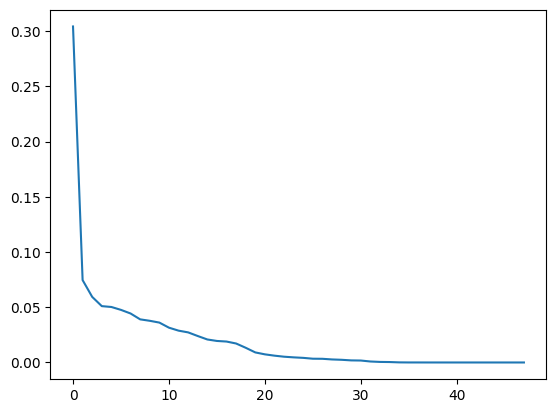

In [14]:
plt.plot(explained_variances)
plt.show()

In [16]:
compo = 3
pca = PCA(n_components=compo) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data=printcipalComponents,
                   columns = [f'pca{num+1}' for num in range(compo)])
pdf

,pca1,pca2,pca3
0,16.381439,-0.945541,-3.532134
1,23.686093,4.014070,-0.621415
2,24.382827,0.540456,-0.604695
3,23.511479,1.373094,0.087756
4,24.145082,0.445592,-0.888799
...,...,...,...
1050,-3.175906,-0.050324,1.600564
1051,-2.272383,-0.659362,0.982030
1052,-3.198223,-0.181470,1.451845
1053,0.036644,-1.594696,0.317168


In [17]:
pca.explained_variance_ratio_

array([0.30429496, 0.0746108 , 0.05939579])

In [18]:
sum(pca.explained_variance_ratio_)

0.43830155033852414

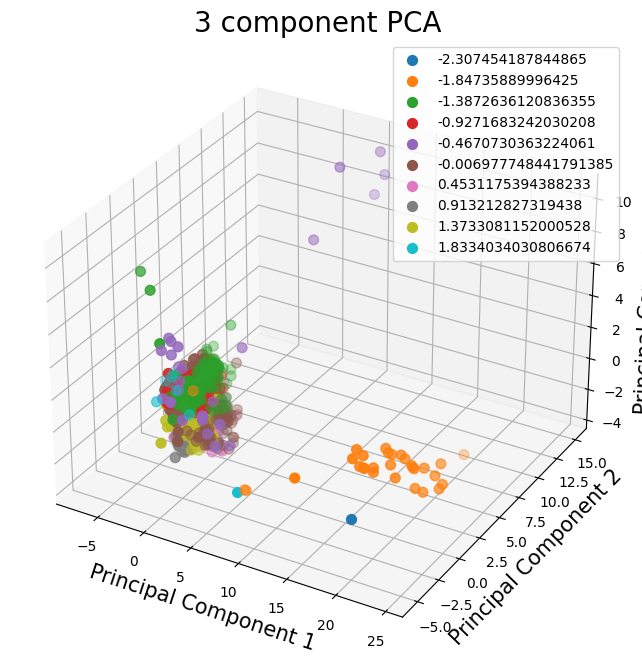

In [21]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize=20)

targets = df['Machining_Process'].unique()
for target in targets:
    indicesToKeep = (df['Machining_Process'] == target)
    ax.scatter(pdf.loc[indicesToKeep, 'pca1']
               , pdf.loc[indicesToKeep, 'pca2']
               , pdf.loc[indicesToKeep, 'pca3']
               , s = 50)
ax.legend(targets)
ax.grid()